In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

face_cascade = cv2.CascadeClassifier('/home/mckc/Downloads/opencv-2.4.13/data/haarcascades_GPU/haarcascade_frontalface_default.xml')

In [12]:
#Reading the image data into numpy
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:], [0.299, 0.587, 0.114])

def load_data():
    import pandas as pd
    import numpy as np
    from PIL import Image
    from skimage.transform import resize
    
    train = pd.read_csv('/home/mckc/TwoClass//train.csv')
    test = pd.read_csv('/home/mckc/TwoClass//test.csv')
    print 'the training data shape is ',train.shape
    print 'the test data shape is ', test.shape
    
    X_tr = np.zeros((1,1944,2592),dtype=np.uint8)
    for i in train.values[:,0]:
        image = rgb2gray(resize(np.array(Image.open(i)),(1944,2592))).astype(np.uint8).reshape(1,1944,2592)
#     print X_tr.shape,image.shape
        X_tr =  np.vstack((X_tr,image))
        Y_tr = train.values[:,1]
    X_tr = X_tr[1:,:,:]
    X_ts = np.zeros((1,1944,2592),dtype=np.uint8)
    for i in test.values[:,0]:
        image = rgb2gray(resize(np.array(Image.open(i)),(1944,2592))).astype(np.uint8).reshape(1,1944,2592)
        X_ts = np.vstack((X_ts,image))
    Y_ts = test.values[:,1]
    X_ts = X_ts[1:,:,:]
    print 'the training file shape',X_tr.shape,Y_tr.shape
    print 'the testing file shape',X_ts.shape,Y_ts.shape
    
    return X_tr,X_ts,Y_tr,Y_ts    

In [10]:
def simulate(X,Y):
    import scipy as sp
    import scipy.ndimage
    complete = np.zeros((1,96,96),dtype=np.uint8)
    Y_complete = []
    for i in range(len(X)):
        complete = np.vstack((complete,X[i,:,:].reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -10,reshape=False,cval=1).reshape(1,96,96)))
        rotated = np.fliplr(X[i,:,:])
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,rotated.reshape(1,96,96)))
        Y_complete = np.append(Y_complete,([Y[i]]*14))
        if i % 10==0:
            print colored((float(i)/len(X)*100 ,' Percentage complete'),'green')
    complete = complete[1:,:,:]
    return complete,Y_complete

In [9]:
def extract_faces(X_tr,Y_tr):
    from skimage.transform import resize
    import time
    start_time = time.clock()
    all_faces = np.zeros((1,96,96),dtype=np.uint8)
    missing = []
    multiple = []
    Y= []
    for i in range(len(X_tr)):
        faces  = face_cascade.detectMultiScale(X_tr[i,:,:],scaleFactor=1.3,minNeighbors=6,minSize=(70, 70))
        n_faces = len(faces)
        if n_faces is 1:
            for (x,y,w,h) in faces:
                fac = np.array(X_tr[i,:,:])[y:(y+h),x:(x+h)]
                out = (resize(fac,(96,96))).reshape((1,96,96))
                all_faces = np.vstack((all_faces,out))
                Y = np.append(Y,Y_tr[i])
        else:
            if n_faces > 1:
                #print ('There are multiple faces for index %d and with length %d' % (i , n_faces))
                missing = np.append(missing,i)
                #all_faces = np.vstack((all_faces,np.zeros((1,96,96),dtype=np.uint8)))
            else:
                #print ('The face is missing for index %d' %i)
                multiple = np.append(multiple,i)
        if i % 10==0:
            print colored((float(i)/len(X_tr)*100 ,' Percentage complete'), 'green')

    all_faces = all_faces[1:,:,:]
    print all_faces.shape
    print time.clock() - start_time, "seconds"
    return all_faces,missing,multiple,Y

In [13]:
X_tr,X_tst,Y_tr,Y_tst = load_data()

the training data shape is  (160, 2)
the test data shape is  (53, 2)
the training file shape (160, 1944, 2592) (160,)
the testing file shape (53, 1944, 2592) (53,)


In [19]:
X_train,missing,multiple,Y_train = extract_faces(X_tr[:,:,:],Y_tr)
X_test,missing_test,multiple_test,Y_test = extract_faces(X_tst,Y_tst)

(0.0, ' Percentage complete')
(6.25, ' Percentage complete')
(12.5, ' Percentage complete')
(18.75, ' Percentage complete')
(25.0, ' Percentage complete')
(31.25, ' Percentage complete')
(37.5, ' Percentage complete')
(43.75, ' Percentage complete')
(50.0, ' Percentage complete')
(56.25, ' Percentage complete')
(62.5, ' Percentage complete')
(68.75, ' Percentage complete')
(75.0, ' Percentage complete')
(81.25, ' Percentage complete')
(87.5, ' Percentage complete')
(93.75, ' Percentage complete')
(0, 96, 96)
298.753896 seconds
(0.0, ' Percentage complete')
(18.867924528301888, ' Percentage complete')
(37.735849056603776, ' Percentage complete')
(56.60377358490566, ' Percentage complete')
(75.47169811320755, ' Percentage complete')
(94.33962264150944, ' Percentage complete')
(0, 96, 96)
99.250716 seconds


In [18]:
import time
start_time = time.clock()
X,Y = simulate(X_tr,Y_tr)
print X.shape,Y.shape
print time.clock() - start_time, "seconds"

ValueError: total size of new array must be unchanged

In [ ]:
def standard(X):
    return (X - X.mean())/X.max()

In [ ]:
X_test = standard(X_test)
X = standard(X)

In [ ]:
X_normal = X.reshape(-1,9216)
X_test_normal = X_test.reshape(-1,9216)
map, Y_number = np.unique(Y, return_inverse=True)
Y_test_numer = np.unique(Y_test, return_inverse=True)[1]

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(verbose=0,n_jobs=-1)
clf.fit(X_normal,Y_number)
Y_logictic= clf.predict(X_test.reshape(-1,9216))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
recognizer = RandomForestClassifier(500,verbose=0,oob_score=True,n_jobs=-1)
recognizer.fit(X_normal,Y_number)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
import lasagne
#from lasagne.layers.cuda_convnet import Conv2DCCLayer as Conv2DLayer
#from lasagne.layers.cuda_convnet import MaxPool2DCCLayer as MaxPool2DLayer
from lasagne import layers
from lasagne.objectives import categorical_crossentropy
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import BatchIterator,visualize,NeuralNet
Conv2DLayer = layers.Conv2DLayer
MaxPool2DLayer = layers.MaxPool2DLayer

net = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', Conv2DLayer),
        ('pool1', MaxPool2DLayer),
        ('dropout1', layers.DropoutLayer),
        ('conv2', Conv2DLayer),
        ('pool2', MaxPool2DLayer),
        ('dropout2', layers.DropoutLayer),
        ('conv3', Conv2DLayer),
        ('pool3', MaxPool2DLayer),
        ('dropout3', layers.DropoutLayer),
        ('hidden4', layers.DenseLayer),
        ('dropout4', layers.DropoutLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    dropout1_p=0.1,
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    dropout2_p=0.2,
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    dropout3_p=0.3,
    hidden4_num_units=1000,
    dropout4_p=0.5,
    hidden5_num_units=1000,
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=2,
    
    update = nesterov_momentum,
    update_learning_rate=0.001,
    update_momentum=0.9,
    max_epochs=300,
    verbose=0
)
net.fit(X.reshape(-1,1,96,96).astype(np.float32), Y_number.astype(np.uint8))

Using gpu device 0: Quadro M2000M (CNMeM is enabled with initial size: 10 MB, cuDNN 5005)


<module 'matplotlib.pyplot' from '/home/mckc/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

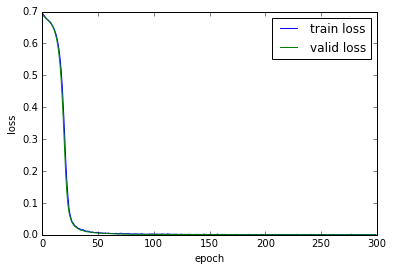

In [15]:
def plot_loss(net):
    train_loss = [row['train_loss'] for row in net.train_history_]
    valid_loss = [row['valid_loss'] for row in net.train_history_]
    plt.plot(train_loss, label='train loss')
    plt.plot(valid_loss, label='valid loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    return plt
plot_loss(net)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)


Y_Keras = np_utils.to_categorical(Y_number, 2)
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(1000, input_dim=9216,activation='relu'))
model.add(Dense(2,activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

import time
model.fit(X.reshape(-1,9216), Y_Keras, nb_epoch=300, batch_size=5,verbose=1, validation_split=0.2, callbacks=[early_stopping]
         validation_data=(X_test.reshape(-1,9216), np_utils.to_categorical(Y_test_numer, 2)))

In [ ]:
model.save

[[70 37 59 59]]
Linear Regression Value ['Abhay' 'Gopika'] [[ 0.92610094  0.07389906]] ['Abhay']
Random Forest Value ['Abhay' 'Gopika'] [[ 0.498  0.502]]

[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.1s finished


 ['Gopika']
Lasagne Value ['Abhay' 'Gopika'] [[ 0.95883393  0.04116604]] ['Abhay']
Keras Value ['Abhay' 'Gopika'] [[ 0.80408061  0.19591942]]


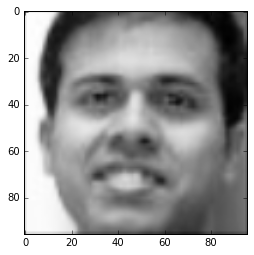

In [16]:
from PIL import Image
from skimage.transform import resize
jpgfile = Image.open("/home/mckc/Downloads/1.jpg")
grey = rgb2gray(np.array(jpgfile))
faces  = face_cascade.detectMultiScale(grey.astype(np.uint8),scaleFactor=1.1,minNeighbors=3,minSize=(30, 30))
print faces


for (x,y,w,h) in faces:
    fac = np.array(grey[y:(y+h),x:(x+h)])
    out = resize(fac,(96,96))
    
plt.imshow(out,cmap=cm.Greys_r)


trial = standard(out)
print 'Linear Regression Value',map,clf.predict_proba(trial.reshape(-1,9216)),map[clf.predict((trial.reshape(-1,9216)))]
print 'Random Forest Value',map,recognizer.predict_proba(trial.reshape(-1,9216)),map[recognizer
                                                                                     .predict((trial.reshape(-1,9216)))]
print 'Lasagne Value',map,net.predict_proba(trial.reshape(-1,1,96,96).astype(np.float16)),map[net.predict((trial.reshape(-1,1,96,96).astype(np.float16)))]
print 'Keras Value',map,model.predict(trial.reshape(-1,9216).astype(np.float64))

[[372 287  64  64]
 [ 43 135 321 321]]
Linear Regression Value ['Abhay' 'Gopika'] [[  1.12036980e-06   9.99998880e-01]] ['Gopika']
Random Forest Value ['Abhay' 'Gopika'] [[ 0.08  0.92]]

[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.1s finished


 ['Gopika']
Lasagne Value ['Abhay' 'Gopika'] [[  1.42235919e-07   9.99999881e-01]] ['Gopika']
Keras Value ['Abhay' 'Gopika'] [[  1.73029803e-05   9.99982715e-01]]


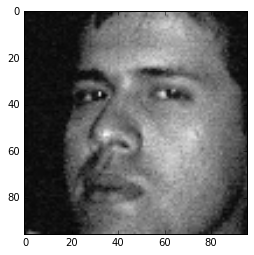

In [17]:
from PIL import Image
from skimage.transform import resize
jpgfile = Image.open("/home/mckc/Downloads/2.jpg")
grey = rgb2gray(np.array(jpgfile))
faces  = face_cascade.detectMultiScale(grey.astype(np.uint8),scaleFactor=1.1,minNeighbors=4,minSize=(30, 30))
print faces


for (x,y,w,h) in faces:
    fac = np.array(grey[y:(y+h),x:(x+h)])
    out = resize(fac,(96,96))
    
plt.imshow(out,cmap=cm.Greys_r)


trial = standard(out)
print 'Linear Regression Value',map,clf.predict_proba(trial.reshape(-1,9216)),map[clf.predict((trial.reshape(-1,9216)))]
print 'Random Forest Value',map,recognizer.predict_proba(trial.reshape(-1,9216)),map[recognizer
                                                                                     .predict((trial.reshape(-1,9216)))]
print 'Lasagne Value',map,net.predict_proba(trial.reshape(-1,1,96,96).astype(np.float16)),map[net.predict((trial.reshape(-1,1,96,96).astype(np.float16)))]
print 'Keras Value',map,model.predict(trial.reshape(-1,9216).astype(np.float64))

In [26]:
import sys
sys.setrecursionlimit(150000)

In [35]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [30]:
import cPickle
# save the classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    cPickle.dump(model, fid)    

# load it again
with open('my_dumped_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)

In [34]:
model = load_model('my_model.h5')

IOError: Unable to open file (Unable to open file: name = 'my_model.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)